In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

***Step-1:Read the data***

In [41]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


In [42]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


***Step-2:Data Quick Checks***

$dtypes$

In [43]:
bank_data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

$columns$

In [44]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

$shape$

In [45]:
bank_data.shape

(4119, 21)

In [46]:
bank_data.shape[0]    #shape[0] represents the number of rows in the dataset

4119

In [47]:
bank_data.shape[1]    #shape[1] represents the number of columns in the dataset

21

$size$

In [48]:
bank_data.size         #size returns the number of observations in the data set

86499

$info$

In [49]:
bank_data.info

<bound method DataFrame.info of       age          job  marital          education default  housing     loan  \
0      30  blue-collar  married           basic.9y      no      yes       no   
1      39     services   single        high.school      no       no       no   
2      25     services  married        high.school      no      yes       no   
3      38     services  married           basic.9y      no  unknown  unknown   
4      47       admin.  married  university.degree      no      yes       no   
...   ...          ...      ...                ...     ...      ...      ...   
4114   30       admin.  married           basic.6y      no      yes      yes   
4115   39       admin.  married        high.school      no      yes       no   
4116   27      student   single        high.school      no       no       no   
4117   58       admin.  married        high.school      no       no       no   
4118   34   management   single        high.school      no      yes       no   

       

***Step-3***

**Convert categorical columns, numerical columns names seperately**

In [50]:
cat_cols=bank_data.select_dtypes(include="object").columns    
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [51]:
num_cols=bank_data.select_dtypes(exclude="object").columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

***Step-4:Fill the missing values***

In [52]:
bank_data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

***Note***
- In the bank additional dataset there is no missing values
- So we will not fill the missing values

***Step-5:Categorical data analysis***

$Unique$

In [54]:
bank_data["job"].unique()

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

$nunique$

In [55]:
bank_data["job"].nunique()

12

$valuecounts$

In [56]:
bank_data["job"].value_counts()

job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64

$Bar chart$

In [57]:
unique=bank_data["job"].unique()
number=[]
for i in unique:
    con=bank_data["job"]==i
    val=len(bank_data[con])
    number.append(val)
    print(f"{i}:{val}")
number

blue-collar:884
services:393
admin.:1012
entrepreneur:148
self-employed:159
technician:691
management:324
student:82
retired:166
housemaid:110
unemployed:111
unknown:39


[884, 393, 1012, 148, 159, 691, 324, 82, 166, 110, 111, 39]

In [58]:
job_df=pd.DataFrame(zip(unique,number),columns=["job","count"])
job_df

,job,count
0,blue-collar,884
1,services,393
2,admin.,1012
3,entrepreneur,148
4,self-employed,159
5,technician,691
6,management,324
7,student,82
8,retired,166
9,housemaid,110


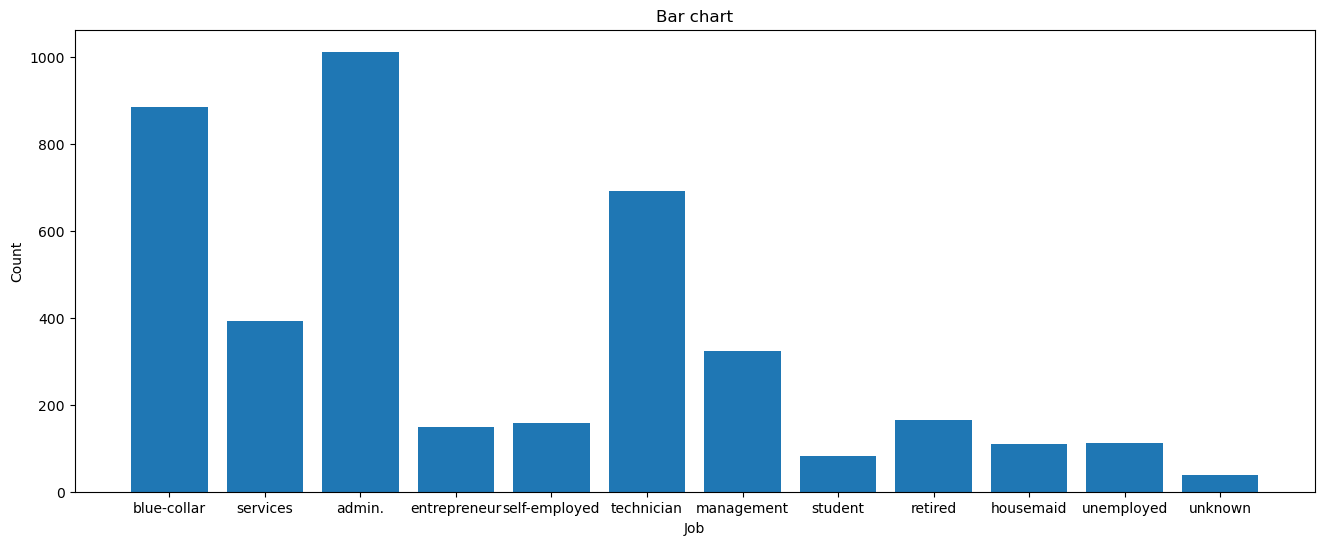

In [59]:
plt.figure(figsize=(16,6))
plt.bar("job","count",data=job_df)
plt.title("Bar chart")
plt.xlabel("Job")
plt.ylabel("Count")
plt.savefig("bank_barchart.png")
plt.show()


$count plot$

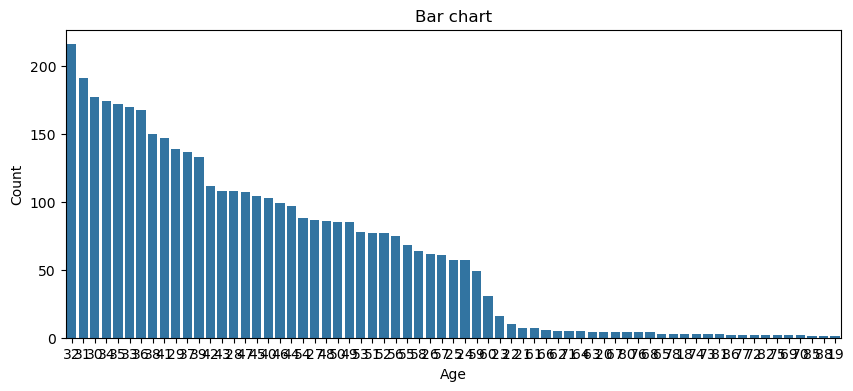

In [60]:
plt.figure(figsize=(10,4))
cdf=bank_data["age"].value_counts()
keys=cdf.keys()
sns.countplot(data=bank_data,x="age",order=keys)
plt.title("Bar chart")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

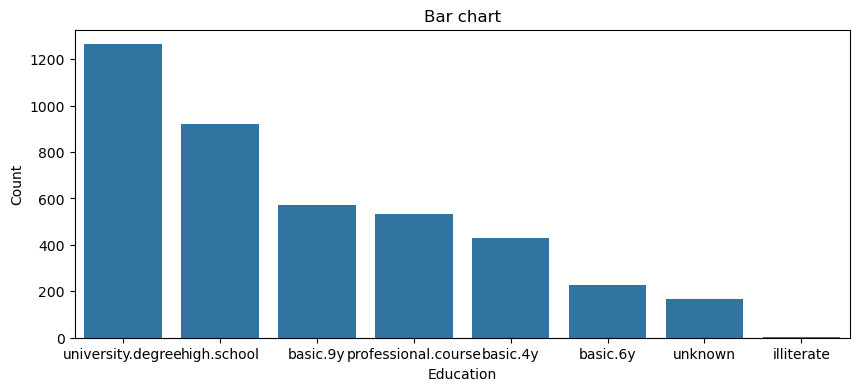

In [77]:
plt.figure(figsize=(10,4))
edf=bank_data["education"].value_counts()
keys=edf.keys()
sns.countplot(data=bank_data,x="education",order=keys)
plt.title("Bar chart")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

$Pie-chart$

In [78]:
education_df=pd.DataFrame(zip(unique,number),columns=["education","count"])
education_df

,education,count
0,basic.9y,574
1,high.school,921
2,university.degree,1264
3,professional.course,535
4,basic.6y,228
5,basic.4y,429
6,unknown,167
7,illiterate,1


In [79]:
unique=bank_data["education"].unique()
number=[]
for i in unique:
    con=bank_data["education"]==i
    val=len(bank_data[con])
    number.append(val)
    print(f"{i}:{val}")
number

basic.9y:574
high.school:921
university.degree:1264
professional.course:535
basic.6y:228
basic.4y:429
unknown:167
illiterate:1


[574, 921, 1264, 535, 228, 429, 167, 1]

In [80]:
bank_data["education"].value_counts()

education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64

In [83]:
edf_bank=bank_data["education"].value_counts()
edf_bank.keys()
values1=edf_bank.values
keys,values1

(Index(['university.degree', 'high.school', 'basic.9y', 'professional.course',
        'basic.4y', 'basic.6y', 'unknown', 'illiterate'],
       dtype='object', name='education'),
 array([1264,  921,  574,  535,  429,  228,  167,    1], dtype=int64))

([<matplotlib.patches.Wedge at 0x19d5a605c90>,
 [Text(0.6272060694548087, 0.9036661697989197, ''),
  Text(-0.9594739282387753, 0.5379681970433322, ''),
  Text(-0.889326518355142, -0.6473780531886463, ''),
  Text(-0.10513099855404238, -1.0949645990364392, ''),
  Text(0.6565005952591312, -0.8826137141606213, ''),
  Text(0.9997857314658887, -0.45872485343309904, ''),
  Text(1.0908746354440346, -0.14139494243021788, ''),
  Text(1.0999996801320415, -0.0008388738920141718, '')])

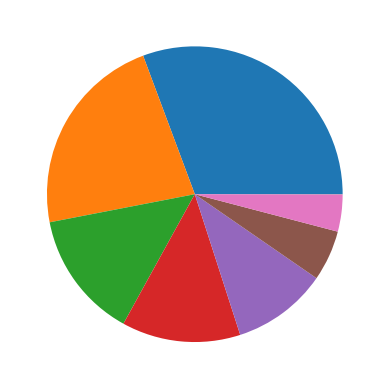

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.pie(values1)

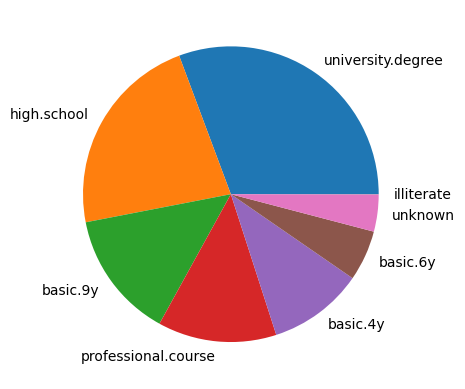

In [85]:
plt.pie(values1,labels=keys)
plt.show()

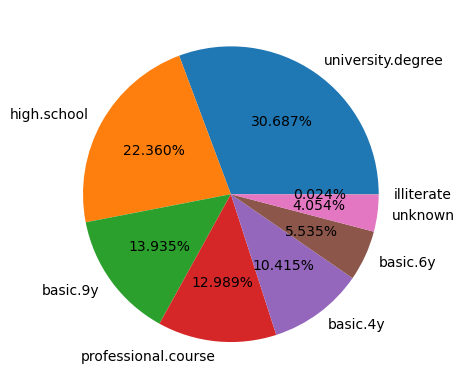

In [86]:
plt.pie(values,labels=keys,autopct="%0.3f%%")
plt.show()

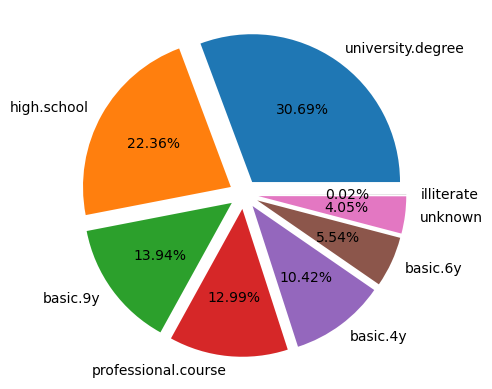

In [88]:
#explode=it will divide the parts
plt.pie(values,explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],labels=keys,autopct="%0.2f%%")
plt.show()

***Step-6-Numerical data analysis***

**Describe function**

In [ ]:
bank_data.describe()

***Histogram***

(array([  98.,  821., 1187.,  804.,  616.,  483.,   61.,   22.,   18.,
           9.]),
 array([18., 25., 32., 39., 46., 53., 60., 67., 74., 81., 88.]),
 <BarContainer object of 10 artists>)

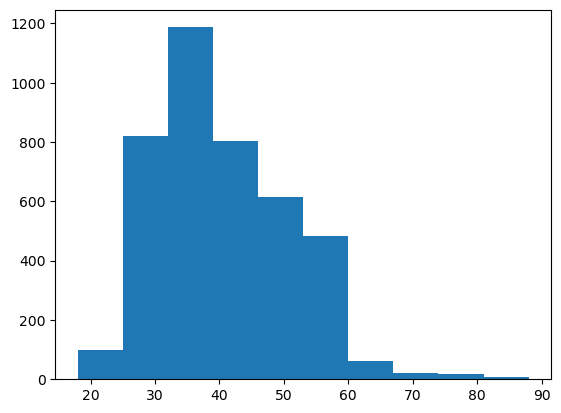

In [89]:

plt.hist(bank_data["age"])

<BarContainer object of 40 artists>


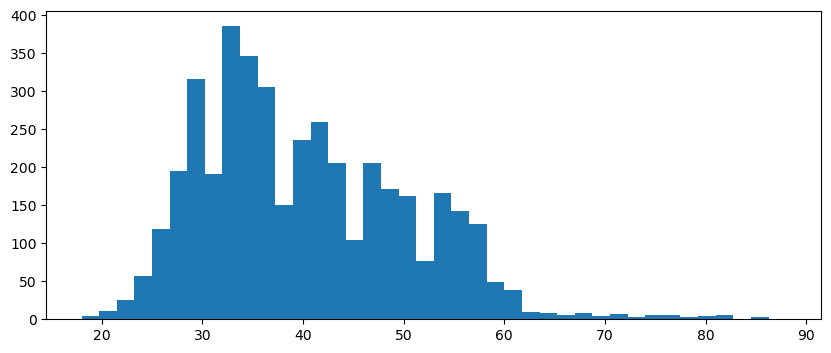

In [90]:
plt.figure(figsize=(10,4))
f,i,n=plt.hist(bank_data["age"],bins=40)
print(n)

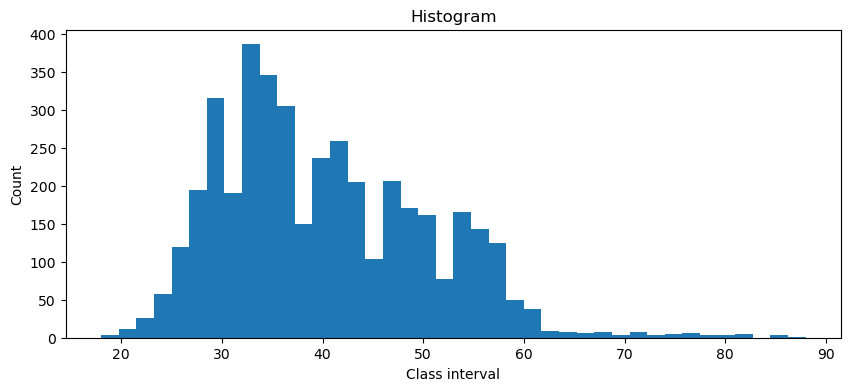

In [91]:
plt.figure(figsize=(10,4))
f,i,n=plt.hist(bank_data["age"],bins=40)
plt.title("Histogram")
plt.xlabel("Class interval")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='age', ylabel='Count'>

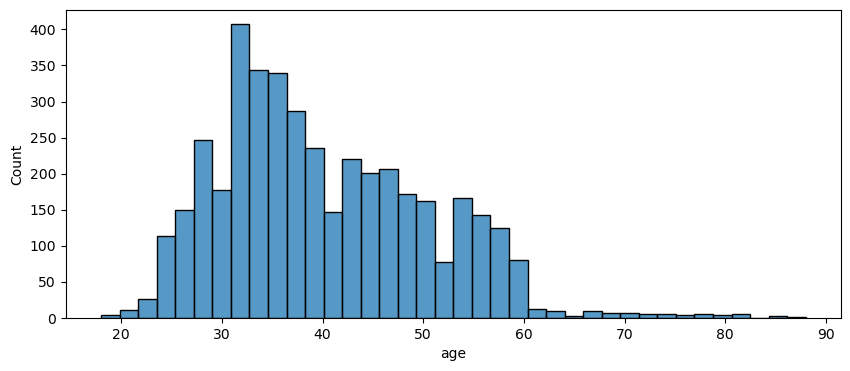

In [92]:
plt.figure(figsize=(10,4))
sns.histplot(bank_data["age"])

***Data Skewness***

- Skewness means when the curve is disorted either to the left or right in a data distribution
- Skewness is 3 types
   - Right skewed
   - Left skewed
   - Symmetric relation


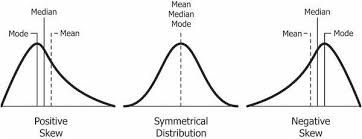

**Symmetrical distribution**

<img decoding="async" src="https://av-eks-blogoptimized.s3.amazonaws.com/96971skw1.png" alt="Skewness and Kurtosis m=m=m,Skewness and Kurtosis" style="width:872px">

**Left Skewed**

<img decoding="async" src="https://av-eks-blogoptimized.s3.amazonaws.com/36018new_negative.png" alt="Negative skewed or left-skewed" style="width:872px">

**Right skewed**

<img decoding="async" src="https://av-eks-blogoptimized.s3.amazonaws.com/64710new_positive.png" alt="1. Positive skewed or right-skewed&nbsp;&nbsp;" style="width:872px">

***Step-7***

***Box plot creation***

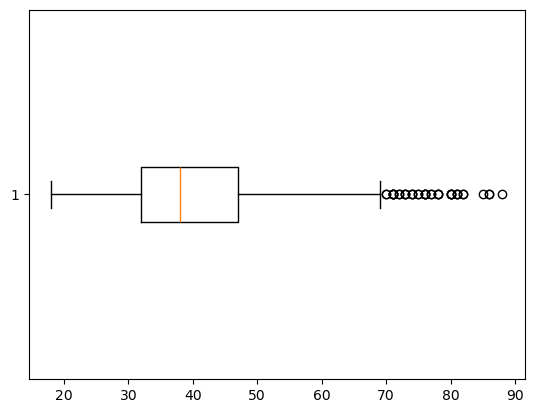

In [93]:
plt.boxplot(bank_data["age"],vert=False)
plt.show()

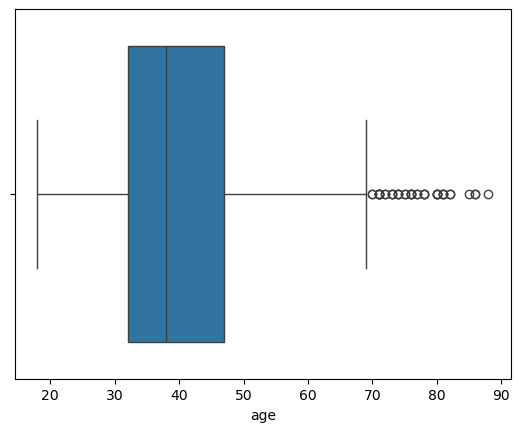

In [94]:
sns.boxplot(bank_data["age"],orient="h")          #horizontal
plt.show()

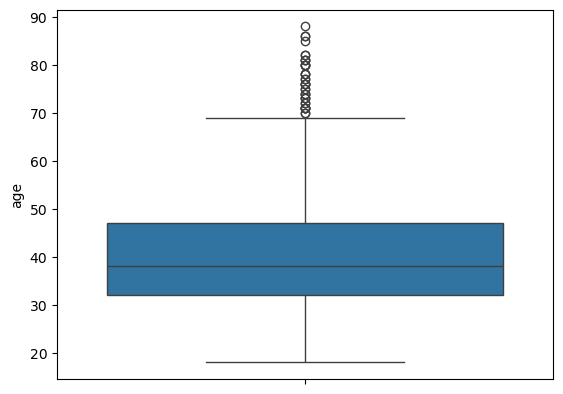

In [95]:
sns.boxplot(bank_data["age"],orient="v")          #hvertical
plt.show()

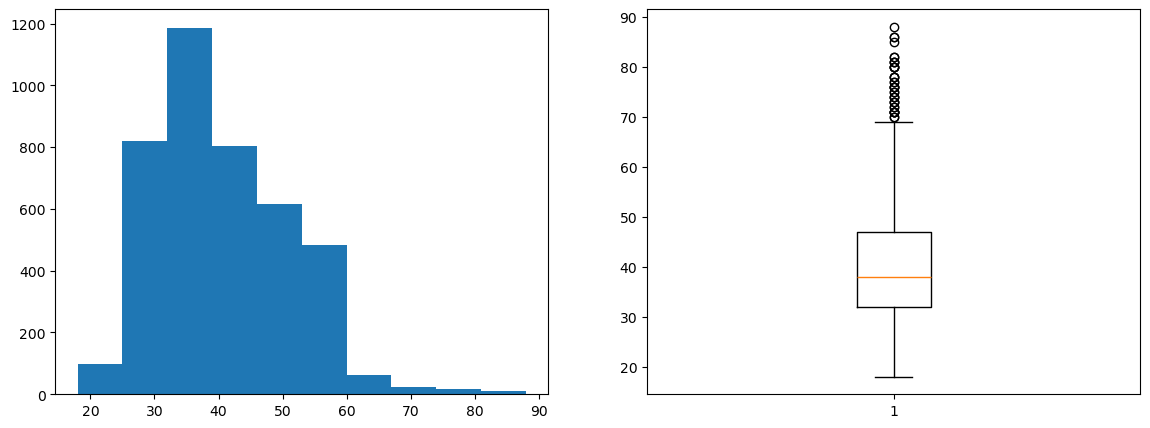

In [96]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(bank_data["age"])
plt.subplot(1,2,2).boxplot(bank_data["age"])
plt.show()

***Outlier Analysis***

**Outliers data**

In [97]:
q1=np.percentile(bank_data["age"],25)
q3=np.percentile(bank_data["age"],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
con1=bank_data["age"]<LB
con2=bank_data["age"]>UB
outliers_data=bank_data[con1|con2]
len(outliers_data)

39

**Non outliers data**

In [98]:
q1=np.percentile(bank_data["age"],25)
q3=np.percentile(bank_data["age"],75)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
con1=bank_data["age"]>LB
con2=bank_data["age"]<UB
outliers_data=bank_data[con1|con2]
len(outliers_data)

4119

***Dealing with outliers***
- Drop the outliers
- Fill with median
- cap the values with q1 ans q3

***Fill with median***

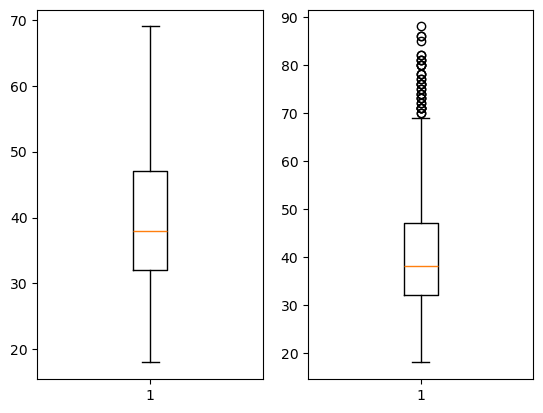

In [99]:
l1=[]
q1=round(np.percentile(bank_data["age"],25),2)
q3=round(np.percentile(bank_data["age"],75),2)
IQR=q3-q1
LB=q1-1.5*IQR
UB=q3+1.5*IQR
median=bank_data["age"].median()
for i in bank_data["age"].values:
    if i < LB or i > UB:
       l1.append(median)
    else:
       l1.append(i)

bank_data_copy=bank_data.copy()
bank_data_copy["age"]=l1
plt.subplot(1,2,1).boxplot(bank_data_copy["age"])
plt.subplot(1,2,2).boxplot(bank_data["age"])
plt.show()


***np.where***

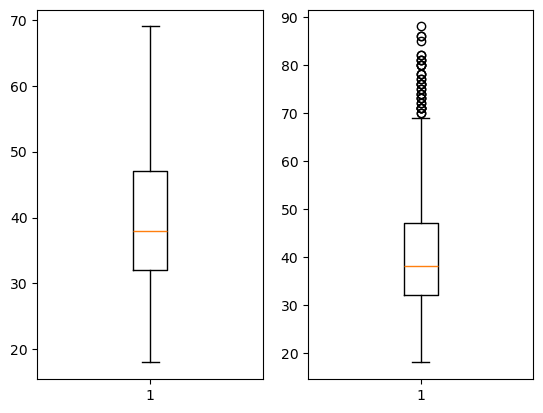

In [100]:
con1=bank_data["age"]<LB 
con2=bank_data["age"]>UB 
con=con1|con2
median=bank_data["age"].median()
t=np.where(con,median,bank_data["age"])
bank_data_copy=bank_data.copy()
bank_data_copy["age"]=t
plt.subplot(1,2,1).boxplot(bank_data_copy["age"])
plt.subplot(1,2,2).boxplot(bank_data["age"])
plt.show()

***Step-8***

***Transformation methods***

- Log transformation
- Exponential transformation
- Reciprocal transformation
- Square root transformation
- Power transformation

$Exponential$

In [101]:
exp_data=np.random.exponential(size=10000)
exp_data

array([1.42333135, 4.29876367, 2.21833587, ..., 0.44468891, 0.16535289,
       0.50000142])

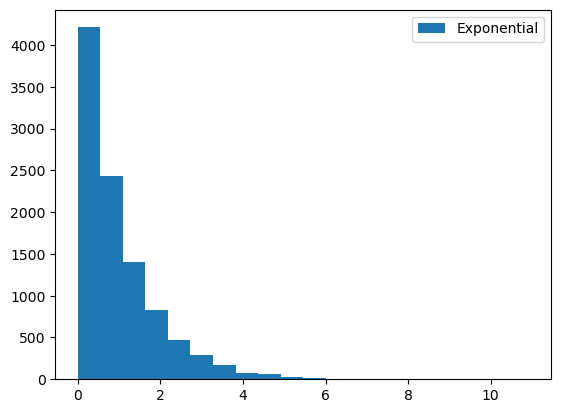

In [102]:
plt.hist(exp_data,bins=20,label="Exponential")
plt.legend()
plt.show()

**Log transformation**

In [103]:
log_data=np.log(exp_data)
log_data

array([ 0.35300014,  1.45832746,  0.79675731, ..., -0.81038032,
       -1.79967337, -0.69314434])

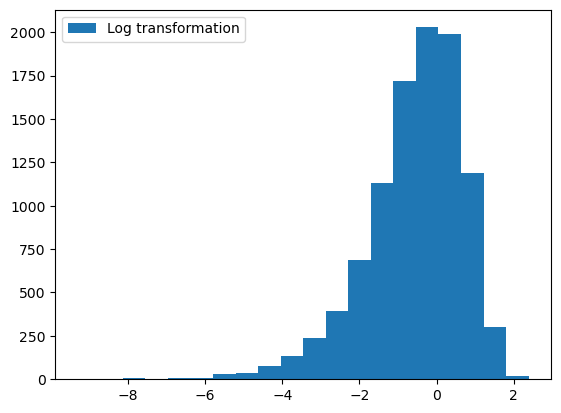

In [104]:
plt.hist(log_data,bins=20,label="Log transformation")
plt.legend()
plt.show()

***Reciprocal***

In [105]:
reciprocal_data=np.reciprocal(exp_data)

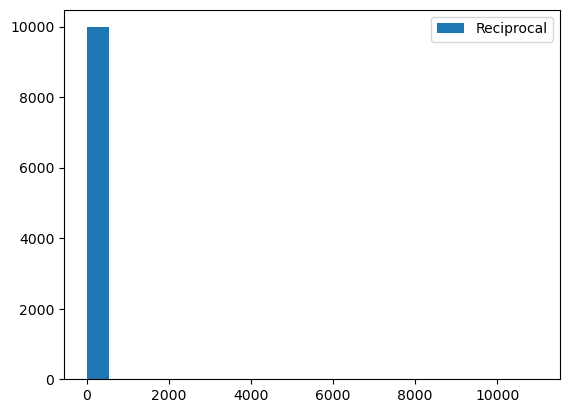

In [106]:
plt.hist(reciprocal_data,bins=20,label="Reciprocal")
plt.legend()
plt.show()

**Square root transformation**

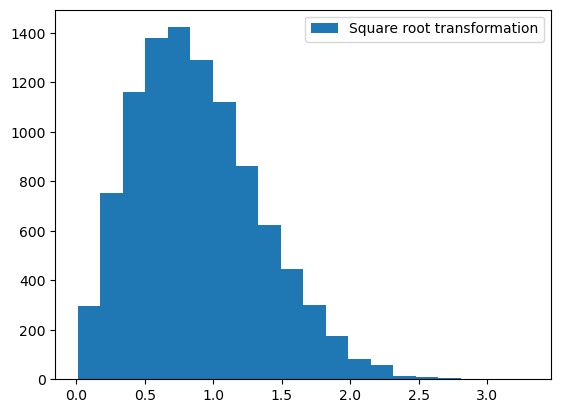

In [107]:
square_root_data=np.sqrt(exp_data)
plt.hist(square_root_data,bins=20,label="Square root transformation")
plt.legend()
plt.show()

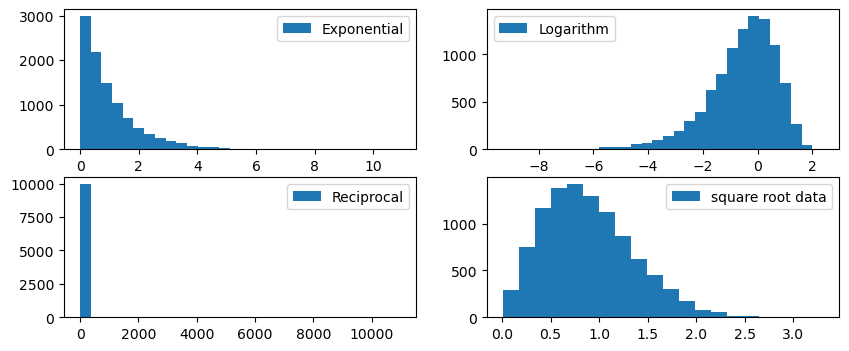

In [108]:
plt.figure(figsize=(10,4))
plt.subplot(2,2,1).hist(exp_data,bins=30,label="Exponential")
plt.legend()
plt.subplot(2,2,2).hist(log_data,bins=30,label="Logarithm")
plt.legend()
plt.subplot(2,2,3).hist(reciprocal_data,bins=30,label="Reciprocal")
plt.legend()
plt.subplot(2,2,4).hist(square_root_data,bins=20,label="square root data")
plt.legend()
plt.show()

***Power tranformations***

- Box-cox
- Ye-johnson



$yeo-johnson$

(array([1083., 1211., 1328., 1402., 1387., 1343., 1106.,  795.,  311.,
          34.]),
 array([-1.76952745, -1.32949627, -0.88946509, -0.44943391, -0.00940273,
         0.43062845,  0.87065963,  1.31069081,  1.75072199,  2.19075317,
         2.63078435]),
 <BarContainer object of 10 artists>)

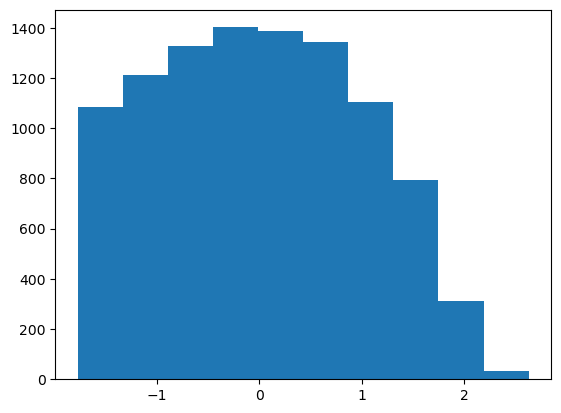

In [109]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer(method="yeo-johnson")
exp_data1=exp_data.reshape(-1,1)
data_trans1=power.fit_transform(exp_data1)
plt.hist(data_trans1)

$Box-cox$

(array([  73.,  406., 1095., 2044., 2574., 2174., 1181.,  394.,   53.,
           6.]),
 array([-3.05935103, -2.38287944, -1.70640785, -1.02993625, -0.35346466,
         0.32300694,  0.99947853,  1.67595012,  2.35242172,  3.02889331,
         3.70536491]),
 <BarContainer object of 10 artists>)

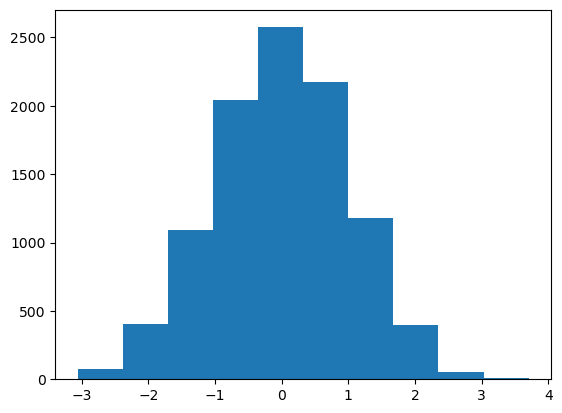

In [110]:
from sklearn.preprocessing import PowerTransformer
power=PowerTransformer(method="box-cox")
exp_data1=exp_data.reshape(-1,1)
data_trans2=power.fit_transform(exp_data1)
plt.hist(data_trans2)

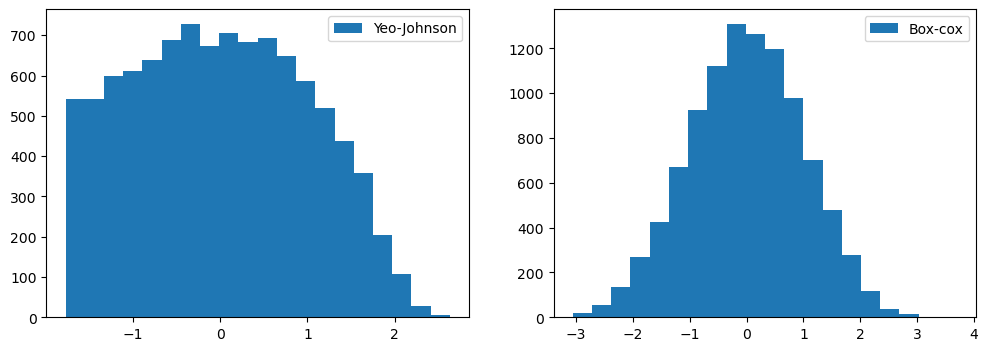

In [111]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1).hist(data_trans1,bins=20,label="Yeo-Johnson")
plt.legend()
plt.subplot(1,2,2).hist(data_trans2,bins=20,label="Box-cox")
plt.legend()
plt.show()



***Step-9:Encoding Methods***

**map**

In [113]:
bank_data.select_dtypes(include="object").columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [114]:
bank_data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [115]:
bank_data["poutcome"].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [116]:
p={"nonexistent":1,"success":2,"failure":0}
p

{'nonexistent': 1, 'success': 2, 'failure': 0}

In [117]:
bank_data["poutcome"].map(p)

0       1
1       1
2       1
3       1
4       1
       ..
4114    1
4115    1
4116    0
4117    1
4118    1
Name: poutcome, Length: 4119, dtype: int64

In [118]:
bank_data["poutcome_new"]=bank_data["poutcome"].map(p)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_new
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,1
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,1
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,1
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,1


In [119]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


In [120]:
p1={"diversed":0,"married":1,"single":2,"unknown":3}
p1

{'diversed': 0, 'married': 1, 'single': 2, 'unknown': 3}

In [121]:
bank_data["marital"].map(p1)

0       1.0
1       2.0
2       1.0
3       1.0
4       1.0
       ... 
4114    1.0
4115    1.0
4116    2.0
4117    1.0
4118    2.0
Name: marital, Length: 4119, dtype: float64

In [123]:
columns=bank_data.select_dtypes(include="object").columns
for i in columns:
        labels=list(bank_data[i].unique())
        values=[i for i in range(len(labels))]
        d=dict(zip(labels,values))
        bank_data[i]=bank_data[i].map(d)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,0,0,0,0,0,0,0,0,0,...,2,999,0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,1,1,1,0,1,0,1,0,0,...,4,999,0,0,1.1,93.994,-36.4,4.855,5191.0,0
2,25,1,0,1,0,0,0,1,1,1,...,1,999,0,0,1.4,94.465,-41.8,4.962,5228.1,0
3,38,1,0,0,0,2,1,1,1,0,...,3,999,0,0,1.4,94.465,-41.8,4.959,5228.1,0
4,47,2,0,2,0,0,0,0,2,2,...,1,999,0,0,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,2,0,4,0,0,2,0,4,3,...,1,999,0,0,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,2,0,1,0,0,0,1,4,0,...,1,999,0,0,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,7,1,1,0,1,0,0,0,2,...,2,999,1,1,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,2,0,1,0,1,0,0,5,0,...,1,999,0,0,1.4,93.444,-36.1,4.966,5228.1,0


***Label encoder***

In [124]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


In [125]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_data["marital"]=le.fit_transform(bank_data["marital"])


In [126]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,1,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,2,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,1,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,1,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,1,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,1,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,1,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,2,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,1,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [127]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


In [128]:
#for all columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=bank_data.select_dtypes(include="object").columns
for i in columns:
       bank_data[i]=le.fit_transform(bank_data[i])
bank_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,0,1,1,0,2,2,0,3,2,...,1,999,0,1,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,0,1,3,0,2,0,1,3,0,...,1,999,0,1,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,8,2,3,0,0,0,0,6,1,...,2,999,1,0,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,0,1,3,0,0,0,0,1,0,...,1,999,0,1,1.4,93.444,-36.1,4.966,5228.1,0


***One hot encoder***

In [129]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


- One hot means if one is ON another one is OFF
- ON represents with 1,and OFF represents with 0
- It will give another extra columns like if we take marital column
- then it give marital_single ,marital_married,marital_unknown 


***np.where***

- It will take 3 arguments
- condition,True and False

In [133]:
con=(bank_data["loan"]=="yes")
bank_data["loan"]=np.where(con,0,1)
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,0,basic.9y,no,yes,1,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,1,high.school,no,no,1,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,0,high.school,no,yes,1,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,0,basic.9y,no,unknown,1,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,0,university.degree,no,yes,1,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,0,basic.6y,no,yes,0,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,0,high.school,no,yes,1,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,1,high.school,no,no,1,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,0,high.school,no,no,1,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


***Step-10:Scaling methods***

***z-score***

In [134]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


In [135]:
od=bank_data["pdays"]
mean1=bank_data["pdays"].mean()
std1=bank_data["pdays"].std()
NR=od-mean1
bank_data["pdays_z"]=NR/std1
bank_data


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_z
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0.201007
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.201007
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0.201007
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0.201007
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0.201007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0.201007
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0.201007
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0.201007
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0.201007


In [136]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


In [137]:
#by using the package
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
bank_data["pdays_ss"]=ss.fit_transform(bank_data[["pdays"]])
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_ss
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0.201031
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0.201031
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0.201031
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0.201031
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0.201031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no,0.201031
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no,0.201031
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no,0.201031
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,0.201031


***minmax scalar***

In [138]:
bank_data=pd.read_csv(r"C:\Users\LENOVO\OneDrive\DATA SCIENCE\data files\bank-additional.csv",sep=";")


In [139]:
od=bank_data["nr.employed"]
min1=bank_data["nr.employed"].min()
max1=bank_data["nr.employed"].max()
NR=od-min1
DR=max1-min1
bank_data["nr.employed_min_max"]=NR/DR
bank_data[["nr.employed","nr.employed_min_max"]]


,nr.employed,nr.employed_min_max
0,5099.1,0.512287
1,5191.0,0.859735
2,5228.1,1.000000
3,5228.1,1.000000
4,5195.8,0.877883
...,...,...
4114,5228.1,1.000000
4115,5228.1,1.000000
4116,5099.1,0.512287
4117,5228.1,1.000000


In [140]:
#using package
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
bank_data["nr.employed_min_max_ss"]=mms.fit_transform(bank_data[["nr.employed"]])
bank_data[["nr.employed","nr.employed_min_max","nr.employed_min_max_ss"]]


,nr.employed,nr.employed_min_max,nr.employed_min_max_ss
0,5099.1,0.512287,0.512287
1,5191.0,0.859735,0.859735
2,5228.1,1.000000,1.000000
3,5228.1,1.000000,1.000000
4,5195.8,0.877883,0.877883
...,...,...,...
4114,5228.1,1.000000,1.000000
4115,5228.1,1.000000,1.000000
4116,5099.1,0.512287,0.512287
4117,5228.1,1.000000,1.000000
